# Topic: Application of Dynamic Graph

Benefit of efficiently embedding graphs in a Euclidean space:
- Enable Geometric and Analytical methods
- Visualization enforces human decision making

## Dynamic FastMap

**Solves "Patching" Problem:**
Find an optimal inear transformation of the FastMap embedding produced at timestep $t$ that minimizes the “difference” relative to the embedding at timestep $t−1$.

**Input:** 
- Total of $T$ snapshots $G^t$ of a dynamic graph on $N$ vertices.
    - $t \in \{1...T\}$
    - $\kappa$: Number of spatial dimensions for the embedding
- $\epsilon$: threshold parameter required for invoking FastMap as a subroutine

**Output:** 
- Sequence of Embeddings: $Z^t = [z^t_1,z^t_2,...,z^t_N]$ for $i\in\{1,2,...,N\}$, $t\in\{0,1,...,T\}$

**Initiation:**
- Obtain FastMap embedding $Z^0$ of $G^0$

**Loop** for $t\in\{1,2,...,T\}$:
1. Obtain FastMap embedding $X^t$ from $G^t$
2. Patching $X^t$ to $Z^t$
    - **Purpose:** To preserve Pairwise differences
    - **Medthod:** 
        - Finding the Linear Transformation $A$ and $b$ that minimizes the difference between $Z^t$ and $Z^t-1$ using Gurobi
        - Performing Linear Transformation $X^t$ to $Z^t$

## Application on Knowledge Graph

**Knowledge Graphs** are a tool of data science that deal with interconnected entities (people, organizations, places, events, etc.).
Entities are the nodes which are connected via edges. Knowledge graphs consist of these entity pairs that can be traversed to
uncover meaningful connections in unstructured data.

The concept of Knowledge Graphs borrows from the Graph Theory. In this particular representation, we store data as:

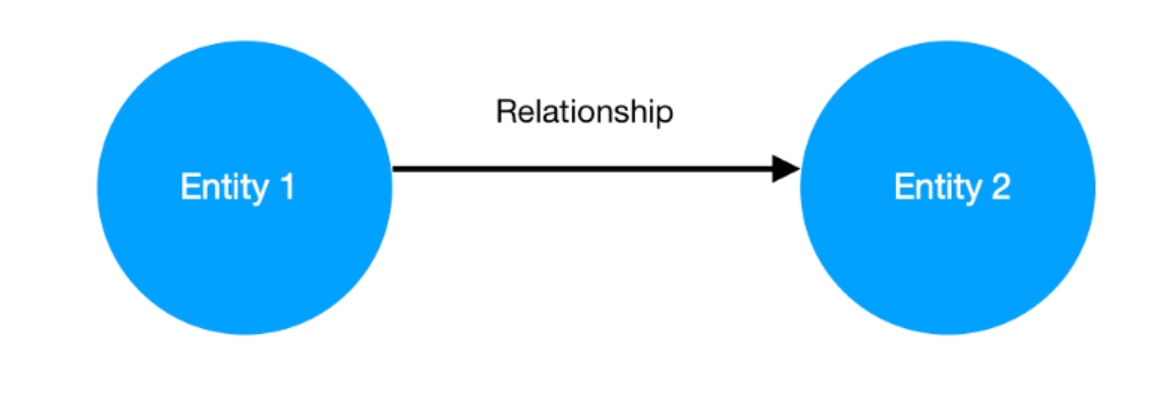

Entity 1 and Entity 2 are called nodes and the Relationship is called an edge. Of course, in a real-world knowledge graph, there are lots of entities and relationships and there is more than one way to arrive at one entity starting from another.

Usually, these types of graphs is modeled with triples, which are sets of three items like (subject, verb, object), with the verb being the relationship between the subject and the object - for example (London, is_capital, England).

(NAGESH SINGH CHAUHAN, Kaggle)

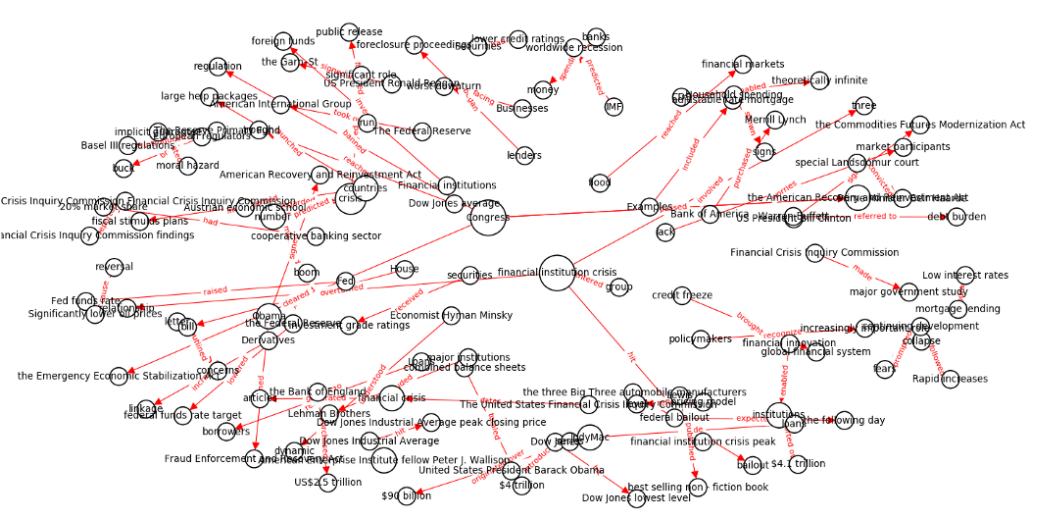

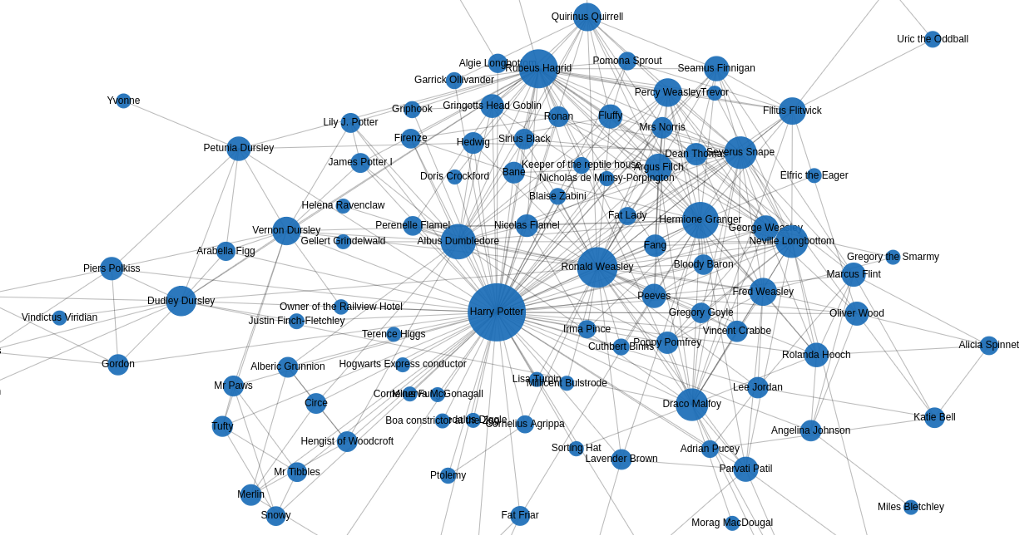

**How NASA is using knowledge graphs to find talent** ([link](https://venturebeat.com/2021/07/24/how-nasa-is-using-knowledge-graphs-to-find-talent/))

VentureBeat: What’s been the technical process behind the implementation of Neo4j?

Meza: The first part was trying to think about what’s going to be our occupational taxonomy. We looked at: “How do we identify an occupation? What is the DNA of an occupation?” And similarly, we looked at that from an employee perspective, from a training perspective, and from a program or project perspective. So simply put, we broke everything down into three different categories for each occupation: **a piece of knowledge, a skill, and a task**.

VentureBeat: How are you using those categories to build a data model?

Meza: If you can start identifying people that have great knowledge in natural language processing, for example, and the skills they need to do a task, then from an occupation standpoint you can say that specific workers need particular skills and abilities. Fortunately, there’s a database from [the Department of Labor called O*NET](https://www.onetonline.org/), which has details on hundreds of occupations and their elements. Those elements consist of knowledge, skills, abilities, tasks, workforce characteristics, licensing, and education. So that was the basis for our Neo4j graph database. We then did the same thing with training. Within training, you’re going to learn a piece of knowledge; to learn that piece of knowledge, you’re going to get a skill; and to get that skill, you’re going to do exercises or tasks to get proficient in those skills. And it’s similar for programs: we can connect back to what knowledge, skills, and tasks a person needs for each project.

VentureBeat: What will this approach mean for identifying talent at NASA?

Meza: I think it will give the employees an opportunity to see what’s out there that may interest them to further their career. If they want to do a career change, for example, they can see where they are in that process. But I also think it will help us align our people better across our organization, and we will help track and maybe predict where we might be losing skills, where we maybe need to modify skills based on the shifting of our programs and the shifting of our mission due to administration changes. So I think it’ll make us a little bit more agile and it will be easier to move our workforce.

### Generation of Knowledge Graph using FastMap

**Typical way of Generating KG** involves two steps:
1. Scraping and tokenizing sentences; Extracting the subject, object and relation.
2. Building Network

**My way of Generating KG using FastMap**:
1. Initiate from one keyword
2. Search keyword on Google and scrape for articles that are related
3. Build an empty dictionary recording counts of related words
4. Loop through articles:
    - Tokenize article and remove stopwords
    - update dictionary on the count of the words
5. Only keep words that have count number higher than threshold/Keep top 20
6. For every keyword, repeat the whole process

Perform FastMap on the dictionaries

**Another way**:
1. Create a list of keywords by downloading from O\*NET or EMSI Skill API
2. Acquire the closeness between each pair of keywords by searching on Google using advanced search: "Keyword1" AND "Keyword2" using the amount of search results
3. Perform FastMap Algorithm

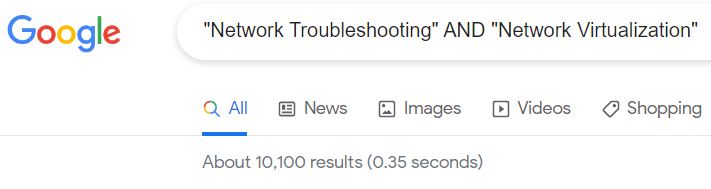
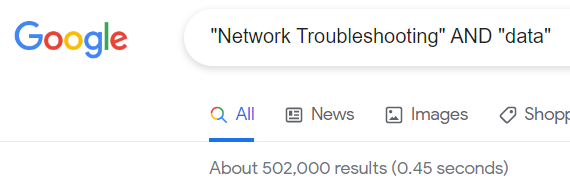

**Problem:** How to represent the closeness of relation in mathematical distance? What if two words are not related at all?

**PS:** Both ways of generation will be lacking the information about what kind of relation it is between each pair of objects.

### Dynamic Knowledge Graph

There has not been any resource on a Dynamic KG. However, based on my understanding of KG and Dynamic FastMap, a Dynamic KG is a KG with another time dimension. We can create such a Dynamic KG by generating one KG every year or month. By using Dynamic FastMap on such a collection of KGs, we can possibly observe how and where new areas of knowledge were created, how areas of knowledge were related and more.

**Keywords Example**

In [12]:
import requests
import json

In [3]:
CLIENT_ID = "k5ef7hyp0ia4j2u4"
CLIENT_SECRET = "eMGBli3L"

In [4]:
def findToken():
    url = "https://auth.emsicloud.com/connect/token"
    payload = f"client_id={CLIENT_ID}&client_secret={CLIENT_SECRET}&grant_type=client_credentials&scope=emsi_open"
    headers = {'Content-Type': 'application/x-www-form-urlencoded'}
    response = requests.request("POST", url, data=payload, headers=headers)
    token = response.text.split(",")[0].split(":")[1].strip("\"")
    #print(f"Token: {token}")
    return token

In [13]:
ACCESS_TOKEN = findToken()

url = "https://emsiservices.com/skills/versions/latest/skills"

querystring = {"q":".NET","typeIds":"ST1,ST2","fields":"name","limit":"100"}

headers = {'Authorization': f'Bearer {ACCESS_TOKEN}'}

response = requests.request("GET", url, headers=headers, params=querystring)
data = json.loads(response.text)["data"]

In [15]:
skill_list = [d["name"] for d in data]

In [16]:
skill_list

['Network Switches',
 '.NET Framework',
 'Network Routing',
 'Local Area Networks',
 'ASP.NET',
 'Computer Networks',
 'Wide Area Networks',
 'Network Security',
 'Network Engineering',
 'Networking Hardware',
 'Virtual Private Networks (VPN)',
 'Network Administration',
 'Network Infrastructure',
 'Network Troubleshooting',
 'Network Protocols',
 'Wireless Networks',
 'Network Architecture',
 'Network Planning And Design',
 'Network Monitoring',
 'Juniper Network Technologies',
 'Visual Basic .NET (Programming Language)',
 'NetApp Applications',
 'Professional Networking',
 'Telecommunications Networks',
 'Network Support',
 'Network Performance Management',
 'Business Networking',
 'Cisco Networking',
 'Social Networks',
 'Electrical Networks',
 'Network Management',
 'Network Communications',
 'Virtual Local Area Network (VLAN)',
 'Access Network',
 'ASP.NET MVC Framework',
 'Network Analysis',
 'Complex Networks',
 'Network Topology',
 'Simple Network Management Protocols',
 'Netwo